<a href="https://colab.research.google.com/github/mar-wong/JupyterLab_Labor/blob/main/Kopie_von_Newton_Abkuehlen_ODE_Sliders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'>**Numerische Lösung der DLG 1.Ordnung zum Newtonschen Abkühlungsgesetz** </font>

In [ ]:
%%capture
%pip install matplotlib pandas scikit-learn

Newtons Abkühlungsgesetz kann folgendermaßen zusammengefasst werden:

Die Geschwindigkeit der Temperaturänderung eines Objekts ist proportional zum Unterschied zwischen seiner Temperatur und der Umgebungstemperatur $T_{U} $. $$ \frac{dT}{T\ -T_{U} \ } \ =\ -\ k\cdot dt $$

* $\frac{dT}{dt\ }$ die Änderungsrate der Temperatur über die Zeit.
*  k ist  eine positive Proportionalitätskonstante, auch Abkühlungskonstante oder Wärmeübergangskoeffizient genannt.Die Proportionalitätskonstante hängt von der Oberfläche, der Masse und der spezifischen Wärmekapazität des Körpers sowie vom Konvektionskoeffizient ab.
* $ T_0 $ ist die Anfangstemperatur des Körpers

Die exakte Lösung dieser Differentialgleichung ist
$$T( t) \ =\ T_{U} \ +\ ( T_{0} \ -T_{U}) \cdot e^{-k\cdot t} $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider, IntSlider, FloatText

## Numerische Lösung der Differentialgleichung mit Hilfe der Libraries vom SciPy
[scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy-integrate-solve-ivp).

Die Wirkung der Anfangstemperatur $T_0 $, der Temperatur der der Umgebung $T_U$ sowie der Abkühlungskonstante k auf den zetlichen Verlauf der Temperatur T eines Körpers lässt sich mit Hilfe der Sliders untersuchen.

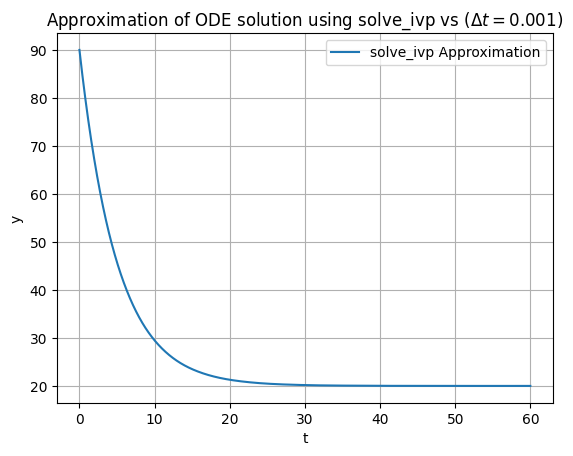

In [ ]:
#Numerische Lösung der ODE 1.Ordnung zum Abkühlungsgesetz von Newton

def solve_ivp_plot(dx,k, T_U, T_0):
    # Define the right-hand side function for the ODE
    function = lambda t, y: -k*(y - T_U)


    # Initial condition
    y0 = [T_0]

    # Time span
    t_span = [0, 60]

    # Solve the ODE using solve_ivp
    sol = solve_ivp(function, t_span, y0, t_eval=np.arange(0, 60, dx))



    # Plotting the solve_ivp approximation and e^x on the same graph
    plt.plot(sol.t, sol.y[0], label='solve_ivp Approximation')
    #plt.plot(t_values, e_values, label='e^x')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(f'Approximation of ODE solution using solve_ivp vs ($\Delta t = {dx}$)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call solve_ivp_plot for different values of dt
for dt in [0.001]:
    solve_ivp_plot(dt)

T_0_slider = FloatSlider(value=0.4, min=0.1, max=2, step=0.01, description='T_0:')
k_slider = FloatSlider(value=0.05, min=0.01, max=0.1, step=0.01, description='k:')
T_U_slider = FloatSlider(value=0.8, min=0.2, max=3, step=0.01, description='T_U:')
interact(plot_func, T_0=T_0_slider, k=k_slider, T_U=T_U_slider )
pass

# Sources
- https://en.wikipedia.org/wiki/Euler_method
- https://en.wikipedia.org/wiki/Heun%27s_method
- https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
- https://math.okstate.edu/people/yqwang/teaching/math4513_fall11/Notes/rungekutta.pdf

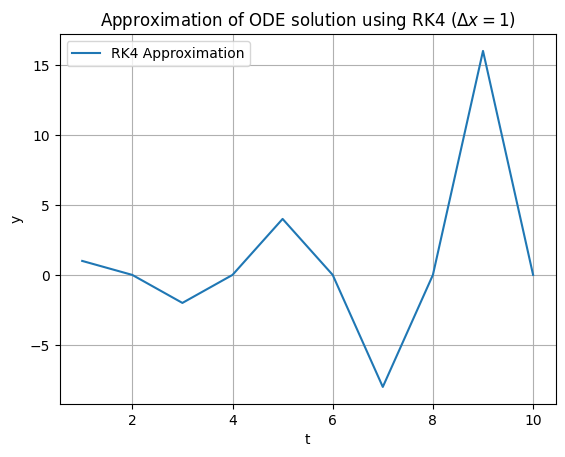

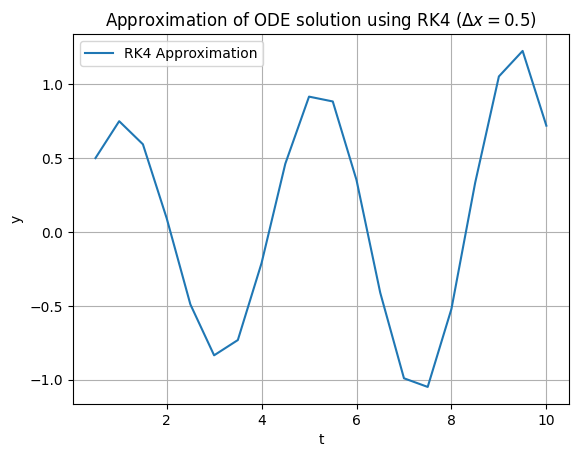

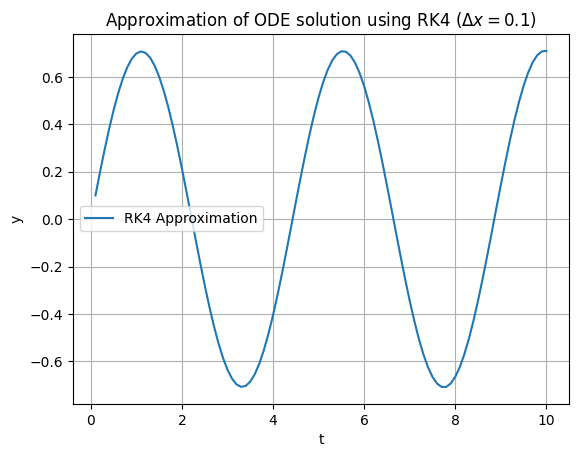

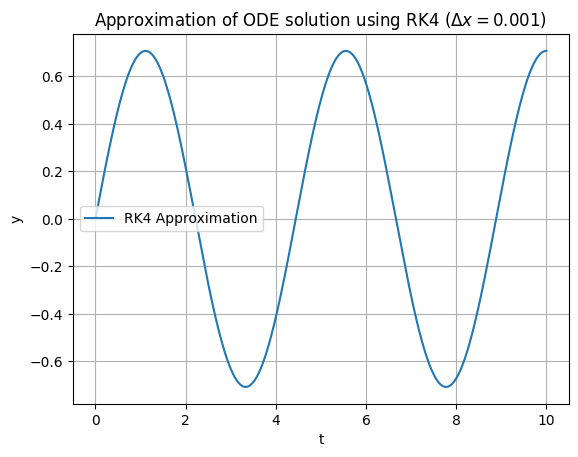

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def show_approx_plot(dx):
    # Function representing the right-hand side of the differential equation
    function = lambda t, y: np.array([y[1], -2*y[0]])

    # Initial point of the function
    t_0, y_0 = 0, np.array([0, 1])  # Initial condition for y and y'

    # Variables for approximating the solution to the ODE
    t_n = t_0
    y_n = y_0

    # Target time for the solution of the ODE
    t_target = 10

    # List to store (t_n, y_n) pairs for the RK4 approximation
    data = []

    for i in range(int(np.ceil(abs(t_target) / dx))):
        k_1 = dx * function(t_n, y_n)
        k_2 = dx * function(t_n + dx, y_n + k_1)
        y_n = y_n + (k_1 + k_2) / 2
        t_n += dx
        data.append((t_n, y_n[0]))

    # Convert the list to a Pandas DataFrame
    df = pd.DataFrame(data, columns=['t', 'y'])

    # Plotting the RK4 approximation and the analytical solution
    t_values = np.linspace(t_0, t_target, len(df))
    plt.plot(df['t'], df['y'], label='RK4 Approximation')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(f'Approximation of ODE solution using RK4 ($\Delta x = {dx}$)')
    plt.legend()
    plt.grid(True)
    plt.show()

for dx in [1, 0.5, 0.1, 0.001]:
    show_approx_plot(dx)
